# **Veri Bilimi 101 Notları**

📉 **RMSE (Root Mean Squared Error – Kök Ortalama Kare Hatası)**


Tanım: Gerçek değerle tahmin arasındaki farkların karesinin ortalamasının kareköküdür.

Küçükse: Tahminlerin gerçek değerlere daha yakındır.

Formül:
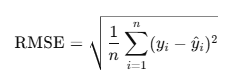

Özelliği: Büyük hataları daha fazla cezalandırır çünkü karesini alır.



**🌲 Decision Tree (Karar Ağacı)**

Tanım: Verileri dallara ayırarak karar veren bir makine öğrenmesi algoritmasıdır.

Ne işe yarar?: Sınıflandırma (classification) ve regresyon (regression) problemlerinde kullanılır.

Nasıl çalışır?: Veriyi böle böle (if-else gibi) bir ağaç yapısı oluşturur.

Örn: "Eğer yaş < 18 ise → çocuk sınıfı, değilse → yetişkin"

**⛰️ Local Optimum (Yerel En İyi)**
Tanım: Bir modelin eğitim sırasında ulaştığı, çevresine göre en iyi ama globalde en iyi olmayan sonuç noktasıdır.

Problem nedir?: Model bu noktaya "takılabilir", daha iyi bir sonuç potansiyelini kaçırabilir.

Örnek: Dağlık bir arazide küçük bir tepeye tırmandığını düşün; en yüksek nokta orası olmayabilir ama orada durursun.

**🧮 RMSLE (Root Mean Squared Logarithmic Error – Kök Ortalama Logaritmik Kare Hatası)**

Tanım: RMSE'nin logaritmalı versiyonudur.

Ne zaman kullanılır?: Hedef değişken çok büyük sayılardan oluşuyorsa ve oransal hataları ölçmek istiyorsan.

Avantajı:Küçük farkları fazla önemsemez, büyük değerlerdeki oransal hataları dikkate alır.

**📊 R² (R-kare) Nedir?**

R² (Determination Coefficient – Belirleme Katsayısı), bir regresyon modelinin tahminlerinin ne kadar başarılı olduğunu ölçen bir metriktir.


✅ Örnek:
Diyelim bir ev fiyatı modelin var ve:

Gerçek fiyatlar: [100k, 150k, 200k]

Model tahminleri: [110k, 140k, 195k]

Modelin hatası düşükse, R² → 1'e yaklaşır.
Model rastgele sallıyorsa, R² → 0 hatta negatif olur.


Yüksek R² her zaman iyi bir model anlamına gelmez (özellikle aşırı öğrenmede / overfitting).

Kategorik verilerde R² kullanılmaz, sadece regresyonda geçerlidir.

**Kategorik ve Eksik Veri Problemi**

❓**1. Kategorik problem Nedir?**

Makine öğrenmesi algoritmaları genellikle sayısal (numeric) verilerle çalışır.

Ama birçok veri kümesinde kategorik sütunlar vardır: örn. cinsiyet = "Erkek", şehir = "Ankara"

⚠️ Problem:
Bu tür verileri doğrudan modele verirsen hata alırsın


❓ **2. Eksik Veri Problemi  (Missing Data) Nedir?**

Verinin bazı hücreleri boş olabilir: örn. yaş, gelir, maaş eksik vs.

⚠️ Problem:
Birçok makine öğrenmesi algoritması boş (NaN) değerlerle çalışamaz.


✅ Sonuç
Problem Türü	Neden Önemli?	Ne Yapmalı?

Kategorik Veri	Sayıya çevrilmezse model çalışmaz	One-hot / Label encoding


Eksik Veri	Model çöker ya da yanılır	Sil, doldur ya da tahmin et

**🔍 Subsample Nedir?**

Subsample, genellikle Boosting algoritmalarında (özellikle Gradient Boosting ve XGBoost gibi) kullanılan bir hiperparametredir.
Bu parametre, her ağaç oluşturulurken eğitim verisinin ne kadarının kullanılacağını belirler.

subsample genellikle 0.5–1.0 aralığında seçilir.

Çok düşük bir değer (örn. 0.1) modele yetersiz bilgi verir, underfitting yaşanabilir.

**Hyperparameters**

Bir makine öğrenmesi modelini eğitmeden önce dışarıdan bizim belirlediğimiz ayarlardır.
Modelin nasıl öğrenmesini istediğimizi kontrol ederler.

**🎲 Random Feature Selection (Rastgele Özellik Seçimi) Nedir?**

Random Feature Selection, bir makine öğrenmesi algoritmasının her karar adımında ya da model kurulumunda tüm özellikler yerine rastgele seçilmiş bazı özellikleri kullanmasıdır.

# **Proje**

Veri setine bu linkten ulaşabilirsiniz:

🔗 https://www.kaggle.com/competitions/bluebook-for-bulldozers/data



*   Veri setini indirebilmek için kaggle hesabınızın "Settings" kısmından "Phone verification" yapmanız gerekmektedir.
*   Aksi takdirde veri setini indiremezsiniz.

## Veriyi Okuma ve İnceleme

### Veri Okuma

In [1]:
import pandas as pd
df = pd.read_csv('Train.csv')

display(df.head())

<ipython-input-1-3089014592>:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Train.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Veriyi İnceleme

In [2]:
# DataFrame'in shape'ini öğrenme
print("Shape of the DataFrame:", df.shape)

# DataFrame hakkında özet
print("\nDataFrame Info:")
df.info()

# Sayısal sütunlar için istatistik
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Kategorik sütunlarda benzersiz değerleri inceleme
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# Sayısal sütunlar arasında ilişki var mı yok mu?
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nCorrelation Matrix for Numerical Features:")
display(df[numerical_cols].corr())

# Investigate the unique values in the 'saledate' column
print("\nUnique Values in 'saledate' column:")
display(df['saledate'].unique())

Shape of the DataFrame: (401125, 53)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  obj

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06



Value Counts for Categorical Features:

Value counts for 'UsageBand':


,count
UsageBand,
Medium,33985
Low,23620
High,12034



Value counts for 'saledate':


,count
saledate,
2/16/2009 0:00,1932
2/15/2011 0:00,1352
2/19/2008 0:00,1300
2/15/2010 0:00,1219
2/11/2008 0:00,1100
...,...
1/19/2009 0:00,1
1/3/2008 0:00,1
5/15/1998 0:00,1



Value counts for 'fiModelDesc':


,count
fiModelDesc,
310G,5039
416C,4869
580K,4315
310E,4233
140G,4083
...,...
GD405A1,1
PC310,1
SK160LC-V,1



Value counts for 'fiBaseModel':


,count
fiBaseModel,
580,19798
310,17354
D6,13110
416,12687
D5,9342
...,...
10DG,1
TLK750,1
GD28,1



Value counts for 'fiSecondaryDesc':


,count
fiSecondaryDesc,
C,43235
B,39203
G,36424
H,24050
E,21048
...,...
MC,1
LC7LR,1
-6,1



Value counts for 'fiModelSeries':


,count
fiModelSeries,
II,13202
LC,8936
III,5238
-1,4591
-2,3340
...,...
WT,1
7L,1
Q,1



Value counts for 'fiModelDescriptor':


,count
fiModelDescriptor,
L,15875
LGP,15558
LC,12750
XL,6434
6,2885
...,...
III,1
HighLift,1
4x4x4,1



Value counts for 'ProductSize':


,count
ProductSize,
Medium,62274
Large / Medium,49678
Small,26494
Mini,24840
Large,20975
Compact,6089



Value counts for 'fiProductClassDesc':


,count
fiProductClassDesc,
Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,56166
"Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower",17788
Wheel Loader - 150.0 to 175.0 Horsepower,15114
"Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower",14731
"Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons",13323
...,...
"Hydraulic Excavator, Track - Unidentified (Compact Construction)",38
Wheel Loader - 1000.0 + Horsepower,25
"Hydraulic Excavator, Track - 150.0 to 300.0 Metric Tons",21



Value counts for 'state':


,count
state,
Florida,63944
Texas,51682
California,29019
Washington,15955
Georgia,14309
Maryland,12965
Mississippi,12961
Ohio,12190
Colorado,11254



Value counts for 'ProductGroup':


,count
ProductGroup,
TEX,101167
TTT,80520
BL,79415
WL,71046
SSL,43488
MG,25489



Value counts for 'ProductGroupDesc':


,count
ProductGroupDesc,
Track Excavators,101167
Track Type Tractors,80520
Backhoe Loaders,79415
Wheel Loader,71046
Skid Steer Loaders,43488
Motor Graders,25489



Value counts for 'Drive_System':


,count
Drive_System,
Two Wheel Drive,46139
Four Wheel Drive,32996
No,24428
All Wheel Drive,798



Value counts for 'Enclosure':


,count
Enclosure,
OROPS,173932
EROPS,139026
EROPS w AC,87820
EROPS AC,17
NO ROPS,3
None or Unspecified,2



Value counts for 'Forks':


,count
Forks,
None or Unspecified,178300
Yes,13777



Value counts for 'Pad_Type':


,count
Pad_Type,
None or Unspecified,70614
Reversible,5832
Street,2663
Grouser,25



Value counts for 'Ride_Control':


,count
Ride_Control,
No,77685
None or Unspecified,63116
Yes,7805



Value counts for 'Stick':


,count
Stick,
Standard,48829
Extended,30305



Value counts for 'Transmission':


,count
Transmission,
Standard,140328
None or Unspecified,23147
Powershift,11731
Powershuttle,4244
Hydrostatic,3204
Direct Drive,418
Autoshift,114
AutoShift,44



Value counts for 'Turbocharged':


,count
Turbocharged,
None or Unspecified,75211
Yes,3923



Value counts for 'Blade_Extension':


,count
Blade_Extension,
None or Unspecified,24692
Yes,527



Value counts for 'Blade_Width':


,count
Blade_Width,
14',9615
None or Unspecified,9283
12',4968
16',933
13',329
<12',91



Value counts for 'Enclosure_Type':


,count
Enclosure_Type,
None or Unspecified,21923
Low Profile,2510
High Profile,786



Value counts for 'Engine_Horsepower':


,count
Engine_Horsepower,
No,23937
Variable,1282



Value counts for 'Hydraulics':


,count
Hydraulics,
2 Valve,141404
Standard,104423
Auxiliary,40737
Base + 1 Function,24770
3 Valve,5622
4 Valve,2960
Base + 3 Function,299
Base + 2 Function,127
Base + 5 Function,89



Value counts for 'Pushblock':


,count
Pushblock,
None or Unspecified,19463
Yes,5756



Value counts for 'Ripper':


,count
Ripper,
None or Unspecified,83452
Yes,7902
Multi Shank,7633
Single Shank,5150



Value counts for 'Scarifier':


,count
Scarifier,
None or Unspecified,12719
Yes,12511



Value counts for 'Tip_Control':


,count
Tip_Control,
None or Unspecified,16207
Sideshift & Tip,7070
Tip,1942



Value counts for 'Tire_Size':


,count
Tire_Size,
None or Unspecified,46339
20.5,15242
"14""",8813
23.5,8480
26.5,4482
17.5,3932
29.5,2704
"17.5""",1793
"13""",766



Value counts for 'Coupler':


,count
Coupler,
None or Unspecified,184582
Manual,23301
Hydraulic,6069



Value counts for 'Coupler_System':


,count
Coupler_System,
None or Unspecified,40430
Yes,3028



Value counts for 'Grouser_Tracks':


,count
Grouser_Tracks,
None or Unspecified,40515
Yes,2847



Value counts for 'Hydraulics_Flow':


,count
Hydraulics_Flow,
Standard,42784
High Flow,553
None or Unspecified,25



Value counts for 'Track_Type':


,count
Track_Type,
Steel,84880
Rubber,14273



Value counts for 'Undercarriage_Pad_Width':


,count
Undercarriage_Pad_Width,
None or Unspecified,79651
32 inch,5213
28 inch,3114
24 inch,2962
20 inch,2652
30 inch,1592
36 inch,1519
18 inch,1429
34 inch,531



Value counts for 'Stick_Length':


,count
Stick_Length,
None or Unspecified,78820
"9' 6""",5765
"10' 6""",3456
"11' 0""",1577
"9' 10""",1439
"9' 8""",1434
"9' 7""",1401
"12' 10""",1066
"10' 2""",983



Value counts for 'Thumb':


,count
Thumb,
None or Unspecified,83093
Manual,9358
Hydraulic,6837



Value counts for 'Pattern_Changer':


,count
Pattern_Changer,
None or Unspecified,90255
Yes,8898
No,65



Value counts for 'Grouser_Type':


,count
Grouser_Type,
Double,84653
Triple,14498
Single,2



Value counts for 'Backhoe_Mounting':


,count
Backhoe_Mounting,
None or Unspecified,78652
Yes,20



Value counts for 'Blade_Type':


,count
Blade_Type,
PAT,38612
Straight,13323
None or Unspecified,11431
Semi U,8617
VPAT,3547
U,1862
Angle,1662
No,743
Landfill,25



Value counts for 'Travel_Controls':


,count
Travel_Controls,
None or Unspecified,69923
Differential Steer,4879
Finger Tip,2624
2 Pedal,1142
Lever,840
Pedal,416
1 Speed,10



Value counts for 'Differential_Type':


,count
Differential_Type,
Standard,68073
Limited Slip,1130
No Spin,206
Locking,2



Value counts for 'Steering_Controls':


,count
Steering_Controls,
Conventional,68679
Command Control,537
Four Wheel Standard,138
Wheel,14
No,1



Correlation Matrix for Numerical Features:


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
SalesID,1.000000,0.010725,0.286812,0.150199,0.788917,-0.021582,0.001701,0.004565
SalePrice,0.010725,1.000000,-0.224854,-0.042125,0.015122,-0.046865,0.156453,0.013560
MachineID,0.286812,-0.224854,1.000000,0.160591,0.327118,0.007548,-0.060384,-0.004128
ModelID,0.150199,-0.042125,0.160591,1.000000,0.091757,-0.019982,-0.049762,-0.005781
datasource,0.788917,0.015122,0.327118,0.091757,1.000000,-0.018795,0.067088,0.006475
auctioneerID,-0.021582,-0.046865,0.007548,-0.019982,-0.018795,1.000000,-0.017644,0.033179
YearMade,0.001701,0.156453,-0.060384,-0.049762,0.067088,-0.017644,1.000000,-0.011733
MachineHoursCurrentMeter,0.004565,0.013560,-0.004128,-0.005781,0.006475,0.033179,-0.011733,1.000000



Unique Values in 'saledate' column:


array(['11/16/2006 0:00', '3/26/2004 0:00', '2/26/2004 0:00', ...,
       '10/29/2011 0:00', '11/12/2011 0:00', '12/10/2011 0:00'],
      shape=(3919,), dtype=object)

## Eksik Veriler ve Kategorik Değişkenler

In [3]:
#Eksik Veri analizi
df.isnull().sum().sort_values(ascending=False).head(20)


,0
Pushblock,375906
Tip_Control,375906
Enclosure_Type,375906
Engine_Horsepower,375906
Blade_Extension,375906
Blade_Width,375906
Scarifier,375895
Grouser_Tracks,357763
Hydraulics_Flow,357763
Coupler_System,357667


In [4]:
#Kategorik sütunlar
df.select_dtypes(include='object').nunique()

,0
UsageBand,3
saledate,3919
fiModelDesc,4999
fiBaseModel,1950
fiSecondaryDesc,175
fiModelSeries,128
fiModelDescriptor,139
ProductSize,6
fiProductClassDesc,74
state,53


In [5]:
#Kategorik sütunlar (Label Encoding)
from sklearn.preprocessing import LabelEncoder

df = df.copy()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
df = df.fillna(0)

In [7]:
df.head(30)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,1,668,...,19,29,3,3,3,2,10,7,3,1
1,1139248,57000,117657,77,121,3.0,1996,4640.0,1,1722,...,19,29,3,3,3,2,10,7,3,1
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,0,1382,...,19,29,3,3,3,2,10,7,4,5
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,0,2394,...,19,29,3,3,3,2,10,7,4,5
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,2,3179,...,19,29,3,3,3,2,10,7,4,5
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,1,1028,...,19,29,3,3,3,2,10,7,4,5
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,0,3457,...,18,28,2,1,0,2,10,7,4,5
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,0,680,...,19,29,3,3,3,2,10,7,4,5
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,1,3473,...,18,28,2,1,0,2,10,7,4,5
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,2,3562,...,19,29,3,3,3,2,10,7,3,1


## Aykırı Değer Analizi

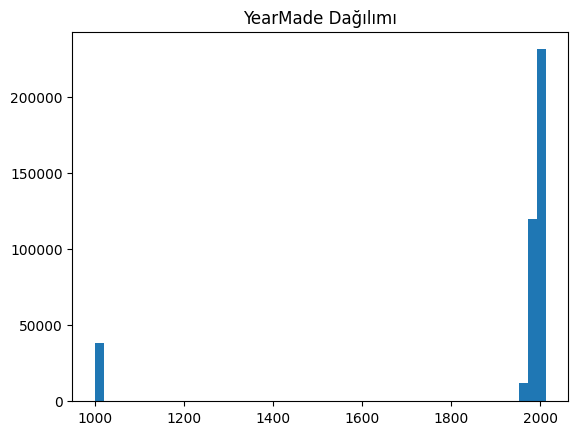

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['YearMade'], bins=50)
plt.title("YearMade Dağılımı")
plt.show()

In [9]:
df = df[df['YearMade'] > 1930]

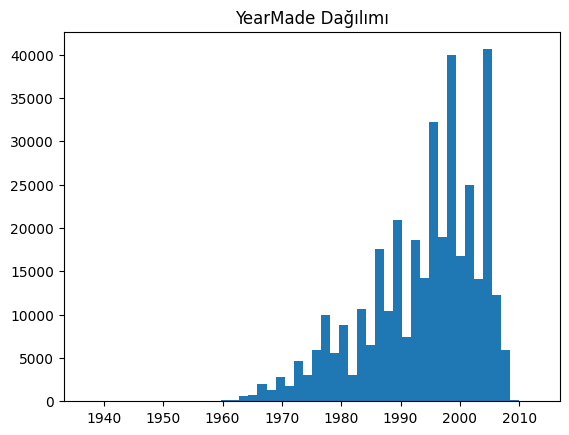

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['YearMade'], bins=50)
plt.title("YearMade Dağılımı")
plt.show()

## Train-Validation-Test olarak veriyi bölme

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalesID', 'SalePrice'], axis=1)
y = df['SalePrice']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Farklı Modellerle Eğitip Karşılaştırma

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

tree_model = DecisionTreeRegressor(max_depth=15)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_val)

# Önce MSLE'yi hesaplayın, ardından RMSLE için karekökünü alın
tree_msle = mean_squared_log_error(y_val, tree_preds) # Burada squared=False yok
tree_rmsle = np.sqrt(tree_msle) # Karekökü manuel olarak alın
print("Karar Ağacı RMSLE:", tree_rmsle)

Karar Ağacı RMSLE: 0.3011347246396269


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

rf_rmsle = mean_squared_log_error(y_val, rf_preds)
rf_rmsle = np.sqrt(rf_rmsle)
print("Random Forest RMSLE:", rf_rmsle)

Random Forest RMSLE: 0.2783010027372357


## En İyi Modeli Seçme

In [14]:
best_model = tree_model
final_preds = best_model.predict(X_test)

final_rmsle = mean_squared_log_error(y_test, final_preds)
final_rmsle = np.sqrt(final_rmsle)

print("Test RMSLE:", final_rmsle)

Test RMSLE: 0.3032227438004811
